## Application to image denoising


In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
# input-image + weight * noise (np.random.normal)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
# keep in range [0., 1]

In [2]:
print(x_train.shape)
print(x_train_noisy.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)


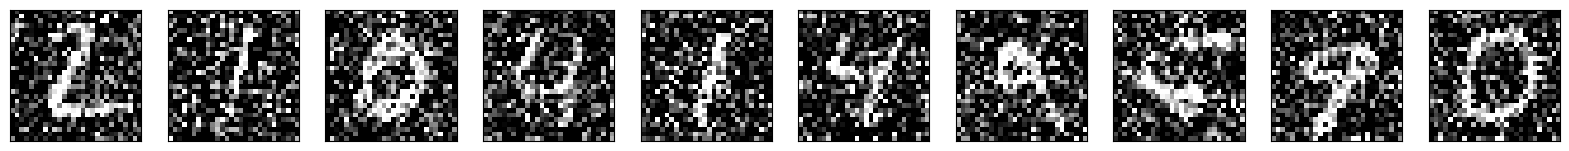

In [3]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [4]:
import keras
from keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

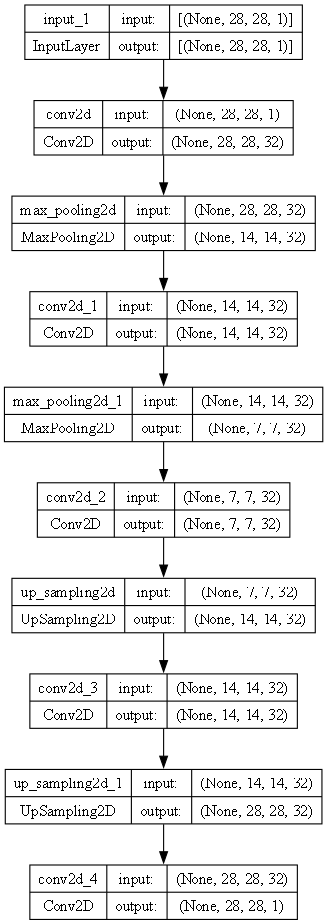

In [5]:
# plot_model autoencoder

from keras.utils import plot_model
plot_model(autoencoder, to_file='Apply_Denoising/autoencoder.png', dpi=80, show_shapes=True)

In [6]:
import tensorflow as tf
import shutil
from keras.callbacks import ModelCheckpoint

# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs

# Mac/Linux
# !rm -rf ./tmp/tb

# Windows
shutil.rmtree("/tmp/tb", ignore_errors=True)

checkpointCNN = ModelCheckpoint("best_autoencoderDenoising", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

# Define the TensorBoard callback
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)

callbacks_list = [checkpointCNN, tensorboard_callback]


# Add the TensorBoard callback to the fit method
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=callbacks_list)

Epoch 1/100
468/469 [============================>.] - ETA: 0s - loss: 0.1637
Epoch 1: val_loss improved from inf to 0.11581, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.1636 - val_loss: 0.1158
Epoch 2/100
469/469 [==============================] - ETA: 0s - loss: 0.1124
Epoch 2: val_loss improved from 0.11581 to 0.10762, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 59ms/step - loss: 0.1124 - val_loss: 0.1076
Epoch 3/100
468/469 [============================>.] - ETA: 0s - loss: 0.1069
Epoch 3: val_loss improved from 0.10762 to 0.10411, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.1069 - val_loss: 0.1041
Epoch 4/100
468/469 [============================>.] - ETA: 0s - loss: 0.1041
Epoch 4: val_loss improved from 0.10411 to 0.10251, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.1041 - val_loss: 0.1025
Epoch 5/100
468/469 [============================>.] - ETA: 0s - loss: 0.1023
Epoch 5: val_loss improved from 0.10251 to 0.10070, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.1023 - val_loss: 0.1007
Epoch 6/100
468/469 [============================>.] - ETA: 0s - loss: 0.1011
Epoch 6: val_loss improved from 0.10070 to 0.09964, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.1011 - val_loss: 0.0996
Epoch 7/100
468/469 [============================>.] - ETA: 0s - loss: 0.1002
Epoch 7: val_loss improved from 0.09964 to 0.09872, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.1001 - val_loss: 0.0987
Epoch 8/100
468/469 [============================>.] - ETA: 0s - loss: 0.0993
Epoch 8: val_loss improved from 0.09872 to 0.09847, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0993 - val_loss: 0.0985
Epoch 9/100
468/469 [============================>.] - ETA: 0s - loss: 0.0987
Epoch 9: val_loss improved from 0.09847 to 0.09764, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0988 - val_loss: 0.0976
Epoch 10/100
468/469 [============================>.] - ETA: 0s - loss: 0.0982
Epoch 10: val_loss improved from 0.09764 to 0.09721, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0982 - val_loss: 0.0972
Epoch 11/100
468/469 [============================>.] - ETA: 0s - loss: 0.0977
Epoch 11: val_loss improved from 0.09721 to 0.09674, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0977 - val_loss: 0.0967
Epoch 12/100
469/469 [==============================] - ETA: 0s - loss: 0.0973
Epoch 12: val_loss improved from 0.09674 to 0.09637, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 60ms/step - loss: 0.0973 - val_loss: 0.0964
Epoch 13/100
469/469 [==============================] - ETA: 0s - loss: 0.0970
Epoch 13: val_loss improved from 0.09637 to 0.09622, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 29s 61ms/step - loss: 0.0970 - val_loss: 0.0962
Epoch 14/100
468/469 [============================>.] - ETA: 0s - loss: 0.0966
Epoch 14: val_loss improved from 0.09622 to 0.09592, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 60ms/step - loss: 0.0966 - val_loss: 0.0959
Epoch 15/100
468/469 [============================>.] - ETA: 0s - loss: 0.0963
Epoch 15: val_loss improved from 0.09592 to 0.09565, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0964 - val_loss: 0.0957
Epoch 16/100
468/469 [============================>.] - ETA: 0s - loss: 0.0961
Epoch 16: val_loss improved from 0.09565 to 0.09539, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0962 - val_loss: 0.0954
Epoch 17/100
469/469 [==============================] - ETA: 0s - loss: 0.0959
Epoch 17: val_loss did not improve from 0.09539
469/469 [==============================] - 27s 57ms/step - loss: 0.0959 - val_loss: 0.0956
Epoch 18/100
468/469 [============================>.] - ETA: 0s - loss: 0.0957
Epoch 18: val_loss improved from 0.09539 to 0.09519, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 59ms/step - loss: 0.0957 - val_loss: 0.0952
Epoch 19/100
468/469 [============================>.] - ETA: 0s - loss: 0.0956
Epoch 19: val_loss improved from 0.09519 to 0.09484, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0956 - val_loss: 0.0948
Epoch 20/100
468/469 [============================>.] - ETA: 0s - loss: 0.0954
Epoch 20: val_loss improved from 0.09484 to 0.09481, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0954 - val_loss: 0.0948
Epoch 21/100
468/469 [============================>.] - ETA: 0s - loss: 0.0952
Epoch 21: val_loss improved from 0.09481 to 0.09470, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 60ms/step - loss: 0.0952 - val_loss: 0.0947
Epoch 22/100
469/469 [==============================] - ETA: 0s - loss: 0.0952
Epoch 22: val_loss did not improve from 0.09470
469/469 [==============================] - 27s 57ms/step - loss: 0.0952 - val_loss: 0.0948
Epoch 23/100
468/469 [============================>.] - ETA: 0s - loss: 0.0950
Epoch 23: val_loss improved from 0.09470 to 0.09467, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0951 - val_loss: 0.0947
Epoch 24/100
468/469 [============================>.] - ETA: 0s - loss: 0.0949
Epoch 24: val_loss improved from 0.09467 to 0.09444, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0949 - val_loss: 0.0944
Epoch 25/100
468/469 [============================>.] - ETA: 0s - loss: 0.0948
Epoch 25: val_loss improved from 0.09444 to 0.09440, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0948 - val_loss: 0.0944
Epoch 26/100
468/469 [============================>.] - ETA: 0s - loss: 0.0947
Epoch 26: val_loss improved from 0.09440 to 0.09424, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0947 - val_loss: 0.0942
Epoch 27/100
468/469 [============================>.] - ETA: 0s - loss: 0.0947
Epoch 27: val_loss improved from 0.09424 to 0.09419, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0947 - val_loss: 0.0942
Epoch 28/100
469/469 [==============================] - ETA: 0s - loss: 0.0945
Epoch 28: val_loss did not improve from 0.09419
469/469 [==============================] - 28s 59ms/step - loss: 0.0945 - val_loss: 0.0943
Epoch 29/100
468/469 [============================>.] - ETA: 0s - loss: 0.0945
Epoch 29: val_loss improved from 0.09419 to 0.09404, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 60ms/step - loss: 0.0945 - val_loss: 0.0940
Epoch 30/100
468/469 [============================>.] - ETA: 0s - loss: 0.0944
Epoch 30: val_loss improved from 0.09404 to 0.09400, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0944 - val_loss: 0.0940
Epoch 31/100
468/469 [============================>.] - ETA: 0s - loss: 0.0943
Epoch 31: val_loss did not improve from 0.09400
469/469 [==============================] - 28s 60ms/step - loss: 0.0943 - val_loss: 0.0941
Epoch 32/100
468/469 [============================>.] - ETA: 0s - loss: 0.0942
Epoch 32: val_loss did not improve from 0.09400
469/469 [==============================] - 28s 60ms/step - loss: 0.0942 - val_loss: 0.0943
Epoch 33/100
468/469 [============================>.] - ETA: 0s - loss: 0.0942
Epoch 33: val_loss improved from 0.09400 to 0.09379, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0942 - val_loss: 0.0938
Epoch 34/100
469/469 [==============================] - ETA: 0s - loss: 0.0941
Epoch 34: val_loss improved from 0.09379 to 0.09370, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0941 - val_loss: 0.0937
Epoch 35/100
468/469 [============================>.] - ETA: 0s - loss: 0.0941
Epoch 35: val_loss did not improve from 0.09370
469/469 [==============================] - 26s 56ms/step - loss: 0.0941 - val_loss: 0.0941
Epoch 36/100
469/469 [==============================] - ETA: 0s - loss: 0.0941
Epoch 36: val_loss did not improve from 0.09370
469/469 [==============================] - 26s 55ms/step - loss: 0.0941 - val_loss: 0.0938
Epoch 37/100
468/469 [============================>.] - ETA: 0s - loss: 0.0940
Epoch 37: val_loss did not improve from 0.09370
469/469 [==============================] - 26s 55ms/step - loss: 0.0940 - val_loss: 0.0940
Epoch 38/100
468/469 [============================>.] - ETA: 0s - loss: 0.0939
Epoch 38: val_loss improved from 0.09370 to 0.09366, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 26s 56ms/step - loss: 0.0939 - val_loss: 0.0937
Epoch 39/100
469/469 [==============================] - ETA: 0s - loss: 0.0939
Epoch 39: val_loss did not improve from 0.09366
469/469 [==============================] - 28s 59ms/step - loss: 0.0939 - val_loss: 0.0937
Epoch 40/100
469/469 [==============================] - ETA: 0s - loss: 0.0939
Epoch 40: val_loss improved from 0.09366 to 0.09355, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 60ms/step - loss: 0.0939 - val_loss: 0.0935
Epoch 41/100
468/469 [============================>.] - ETA: 0s - loss: 0.0939
Epoch 41: val_loss did not improve from 0.09355
469/469 [==============================] - 27s 59ms/step - loss: 0.0938 - val_loss: 0.0942
Epoch 42/100
468/469 [============================>.] - ETA: 0s - loss: 0.0938
Epoch 42: val_loss improved from 0.09355 to 0.09350, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0937 - val_loss: 0.0935
Epoch 43/100
468/469 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 43: val_loss did not improve from 0.09350
469/469 [==============================] - 27s 58ms/step - loss: 0.0937 - val_loss: 0.0938
Epoch 44/100
468/469 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 44: val_loss did not improve from 0.09350
469/469 [==============================] - 28s 60ms/step - loss: 0.0937 - val_loss: 0.0936
Epoch 45/100
468/469 [============================>.] - ETA: 0s - loss: 0.0937
Epoch 45: val_loss did not improve from 0.09350
469/469 [==============================] - 28s 59ms/step - loss: 0.0937 - val_loss: 0.0935
Epoch 46/100
468/469 [============================>.] - ETA: 0s - loss: 0.0936
Epoch 46: val_loss did not improve from 0.09350
469/469 [==============================] - 28s 59ms/step - loss: 0.0936 - val_loss: 0.0935
Epoch 47/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0936 - val_loss: 0.0933
Epoch 49/100
468/469 [============================>.] - ETA: 0s - loss: 0.0936
Epoch 49: val_loss improved from 0.09334 to 0.09329, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0936 - val_loss: 0.0933
Epoch 50/100
468/469 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 50: val_loss improved from 0.09329 to 0.09319, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0935 - val_loss: 0.0932
Epoch 51/100
468/469 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 51: val_loss did not improve from 0.09319
469/469 [==============================] - 27s 58ms/step - loss: 0.0935 - val_loss: 0.0934
Epoch 52/100
468/469 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 52: val_loss did not improve from 0.09319
469/469 [==============================] - 28s 59ms/step - loss: 0.0935 - val_loss: 0.0933
Epoch 53/100
468/469 [============================>.] - ETA: 0s - loss: 0.0935
Epoch 53: val_loss improved from 0.09319 to 0.09313, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0935 - val_loss: 0.0931
Epoch 54/100
468/469 [============================>.] - ETA: 0s - loss: 0.0934
Epoch 54: val_loss did not improve from 0.09313
469/469 [==============================] - 28s 60ms/step - loss: 0.0934 - val_loss: 0.0938
Epoch 55/100
469/469 [==============================] - ETA: 0s - loss: 0.0934
Epoch 55: val_loss did not improve from 0.09313
469/469 [==============================] - 28s 60ms/step - loss: 0.0934 - val_loss: 0.0932
Epoch 56/100
469/469 [==============================] - ETA: 0s - loss: 0.0934
Epoch 56: val_loss did not improve from 0.09313
469/469 [==============================] - 28s 60ms/step - loss: 0.0934 - val_loss: 0.0932
Epoch 57/100
469/469 [==============================] - ETA: 0s - loss: 0.0934
Epoch 57: val_loss did not improve from 0.09313
469/469 [==============================] - 27s 57ms/step - loss: 0.0934 - val_loss: 0.0933
Epoch 58/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 58ms/step - loss: 0.0933 - val_loss: 0.0931
Epoch 60/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 60: val_loss did not improve from 0.09313
469/469 [==============================] - 28s 60ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 61/100
469/469 [==============================] - ETA: 0s - loss: 0.0933
Epoch 61: val_loss did not improve from 0.09313
469/469 [==============================] - 28s 59ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 62/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 62: val_loss did not improve from 0.09313
469/469 [==============================] - 28s 60ms/step - loss: 0.0933 - val_loss: 0.0932
Epoch 63/100
468/469 [============================>.] - ETA: 0s - loss: 0.0933
Epoch 63: val_loss did not improve from 0.09313
469/469 [==============================] - 28s 60ms/step - loss: 0.0933 - val_loss: 0.0933
Epoch 64/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 60ms/step - loss: 0.0932 - val_loss: 0.0931
Epoch 67/100
468/469 [============================>.] - ETA: 0s - loss: 0.0932
Epoch 67: val_loss did not improve from 0.09311
469/469 [==============================] - 27s 58ms/step - loss: 0.0932 - val_loss: 0.0931
Epoch 68/100
468/469 [============================>.] - ETA: 0s - loss: 0.0932
Epoch 68: val_loss improved from 0.09311 to 0.09308, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 29s 61ms/step - loss: 0.0932 - val_loss: 0.0931
Epoch 69/100
468/469 [============================>.] - ETA: 0s - loss: 0.0931
Epoch 69: val_loss did not improve from 0.09308
469/469 [==============================] - 28s 59ms/step - loss: 0.0931 - val_loss: 0.0931
Epoch 70/100
469/469 [==============================] - ETA: 0s - loss: 0.0932
Epoch 70: val_loss did not improve from 0.09308
469/469 [==============================] - 27s 59ms/step - loss: 0.0932 - val_loss: 0.0931
Epoch 71/100
468/469 [============================>.] - ETA: 0s - loss: 0.0931
Epoch 71: val_loss improved from 0.09308 to 0.09307, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 61ms/step - loss: 0.0931 - val_loss: 0.0931
Epoch 72/100
468/469 [============================>.] - ETA: 0s - loss: 0.0931
Epoch 72: val_loss improved from 0.09307 to 0.09293, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0931 - val_loss: 0.0929
Epoch 73/100
468/469 [============================>.] - ETA: 0s - loss: 0.0931
Epoch 73: val_loss did not improve from 0.09293
469/469 [==============================] - 27s 57ms/step - loss: 0.0931 - val_loss: 0.0930
Epoch 74/100
468/469 [============================>.] - ETA: 0s - loss: 0.0931
Epoch 74: val_loss did not improve from 0.09293
469/469 [==============================] - 27s 58ms/step - loss: 0.0931 - val_loss: 0.0929
Epoch 75/100
468/469 [============================>.] - ETA: 0s - loss: 0.0931
Epoch 75: val_loss improved from 0.09293 to 0.09290, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 27s 57ms/step - loss: 0.0931 - val_loss: 0.0929
Epoch 76/100
468/469 [============================>.] - ETA: 0s - loss: 0.0931
Epoch 76: val_loss did not improve from 0.09290
469/469 [==============================] - 27s 59ms/step - loss: 0.0931 - val_loss: 0.0937
Epoch 77/100
468/469 [============================>.] - ETA: 0s - loss: 0.0931
Epoch 77: val_loss did not improve from 0.09290
469/469 [==============================] - 28s 59ms/step - loss: 0.0931 - val_loss: 0.0930
Epoch 78/100
468/469 [============================>.] - ETA: 0s - loss: 0.0930
Epoch 78: val_loss did not improve from 0.09290
469/469 [==============================] - 28s 60ms/step - loss: 0.0930 - val_loss: 0.0930
Epoch 79/100
468/469 [============================>.] - ETA: 0s - loss: 0.0930
Epoch 79: val_loss did not improve from 0.09290
469/469 [==============================] - 28s 61ms/step - loss: 0.0930 - val_loss: 0.0931
Epoch 80/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 88/100
468/469 [============================>.] - ETA: 0s - loss: 0.0929
Epoch 88: val_loss improved from 0.09290 to 0.09286, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 89/100
468/469 [============================>.] - ETA: 0s - loss: 0.0929
Epoch 89: val_loss did not improve from 0.09286
469/469 [==============================] - 27s 58ms/step - loss: 0.0929 - val_loss: 0.0931
Epoch 90/100
469/469 [==============================] - ETA: 0s - loss: 0.0929
Epoch 90: val_loss did not improve from 0.09286
469/469 [==============================] - 28s 60ms/step - loss: 0.0929 - val_loss: 0.0932
Epoch 91/100
468/469 [============================>.] - ETA: 0s - loss: 0.0929
Epoch 91: val_loss did not improve from 0.09286
469/469 [==============================] - 28s 59ms/step - loss: 0.0929 - val_loss: 0.0930
Epoch 92/100
469/469 [==============================] - ETA: 0s - loss: 0.0929
Epoch 92: val_loss did not improve from 0.09286
469/469 [==============================] - 27s 59ms/step - loss: 0.0929 - val_loss: 0.0931
Epoch 93/100
469/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 29s 61ms/step - loss: 0.0929 - val_loss: 0.0928
Epoch 94/100
468/469 [============================>.] - ETA: 0s - loss: 0.0929
Epoch 94: val_loss improved from 0.09281 to 0.09273, saving model to best_autoencoderDenoising
INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0929 - val_loss: 0.0927
Epoch 95/100
469/469 [==============================] - ETA: 0s - loss: 0.0929
Epoch 95: val_loss did not improve from 0.09273
469/469 [==============================] - 27s 58ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 96/100
469/469 [==============================] - ETA: 0s - loss: 0.0929
Epoch 96: val_loss did not improve from 0.09273
469/469 [==============================] - 27s 57ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 97/100
468/469 [============================>.] - ETA: 0s - loss: 0.0928
Epoch 97: val_loss did not improve from 0.09273
469/469 [==============================] - 26s 55ms/step - loss: 0.0928 - val_loss: 0.0930
Epoch 98/100
469/469 [==============================] - ETA: 0s - loss: 0.0929
Epoch 98: val_loss did not improve from 0.09273
469/469 [==============================] - 27s 58ms/step - loss: 0.0929 - val_loss: 0.0929
Epoch 99/100
468/469 [===============

INFO:tensorflow:Assets written to: best_autoencoderDenoising\assets


469/469 [==============================] - 28s 59ms/step - loss: 0.0928 - val_loss: 0.0927


In [7]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 2s 6ms/step


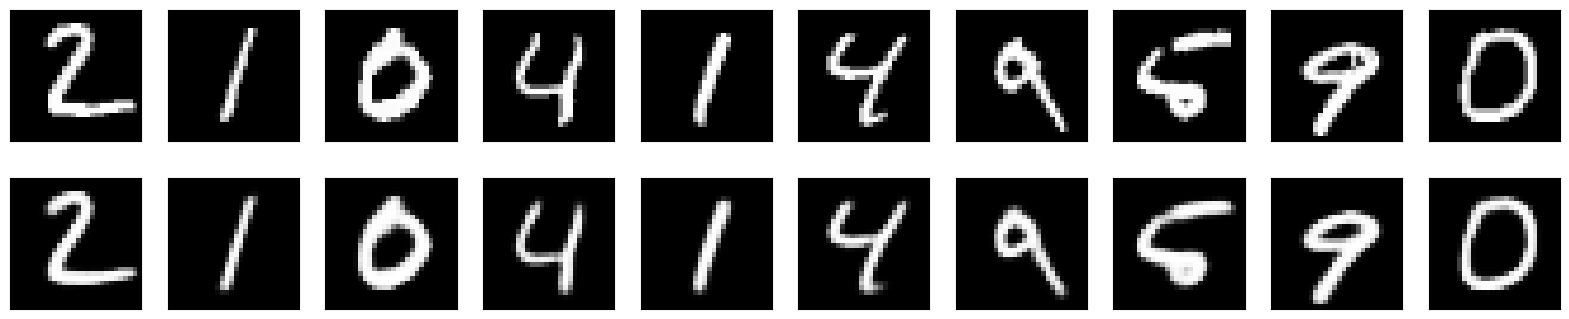

In [8]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [9]:
decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 2s 6ms/step


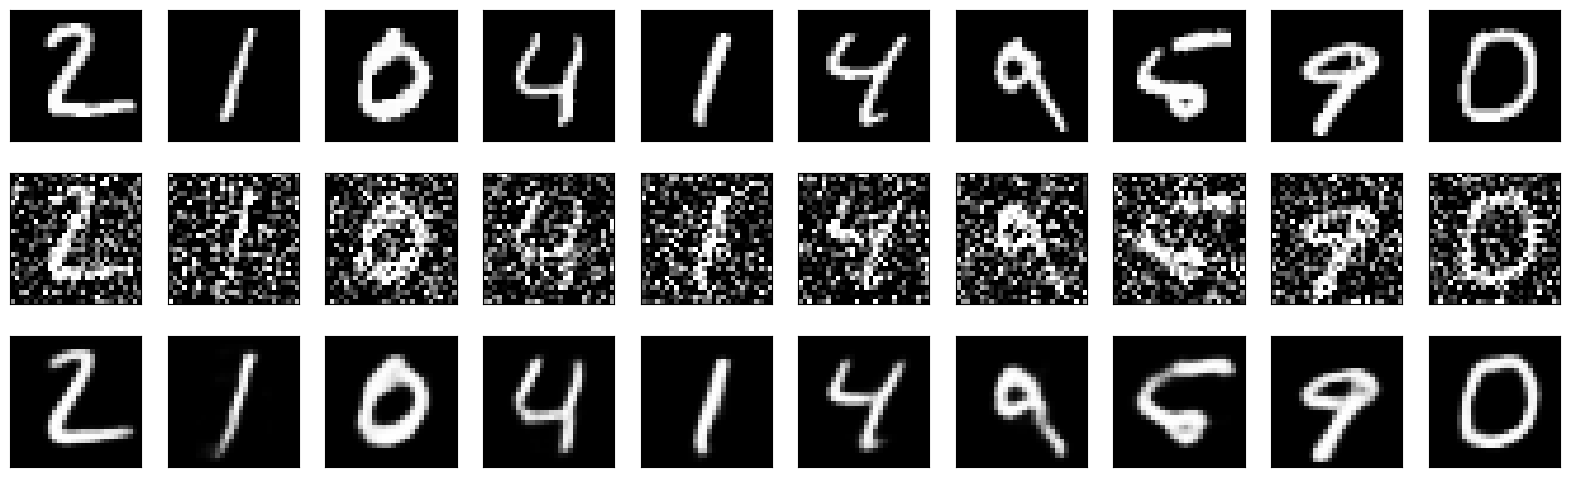

In [16]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display noisy
    ax = plt.subplot(3, n, i + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2 * n)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()